# **22MIS0103 DIVYA V**

# **BASE CODE — (Bernstein–Vazirani Algorithm)**

In [ ]:
!pip install qiskit qiskit-aer matplotlib -q


In [21]:
# ✅ Fix backend BEFORE importing Qiskit
%matplotlib inline
import matplotlib.pyplot as plt

# ✅ Install correct Qiskit versions
!pip install qiskit==2.2.3 qiskit-aer==0.15.1

# ✅ Imports
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram



# ✅ --- ORACLE FUNCTION ---
def oracle(qc, n, marked_state):
    """Oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)


# ✅ --- DIFFUSER FUNCTION ---
def diffuser(qc, n):
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)
    qc.x(range(n))
    qc.h(range(n))


# ✅ --- GROVER MAIN FUNCTION ---
def grover_search(marked_state):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)

    qc.h(range(n))  # superposition
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))

    return qc


# ✅ --- RUN SIMULATION ---
def run_grover(qc):
    sim = AerSimulator()
    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=1024).result()
    counts = result.get_counts()

    # ✅ FIXED: must create a figure manually for Colab
    plt.figure(figsize=(6,4))
    plot_histogram(counts)
    plt.show()

    return counts


# ✅ RUN BASE EXAMPLE
marked_state = "101"
print("Searching for:", marked_state)

qc = grover_search(marked_state)
print(qc.draw())

counts = run_grover(qc)
print("Result counts:", counts)


Searching for: 101
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


<Figure size 600x400 with 0 Axes>

Result counts: {'100': 25, '001': 32, '111': 42, '011': 28, '110': 34, '000': 39, '010': 31, '101': 793}


# **TASK 1: Change Secret String s**




Running Grover for marked state: 111


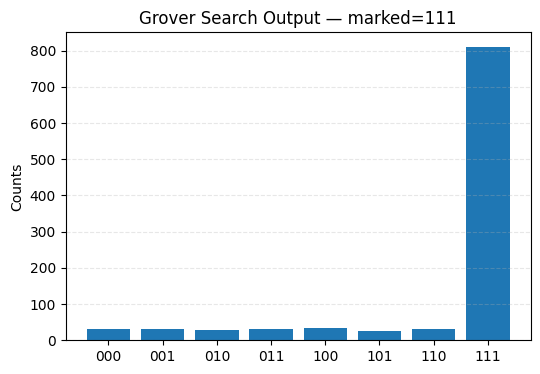

Counts: {'101': 27, '110': 32, '010': 29, '000': 30, '001': 30, '100': 34, '011': 32, '111': 810}

Running Grover for marked state: 010


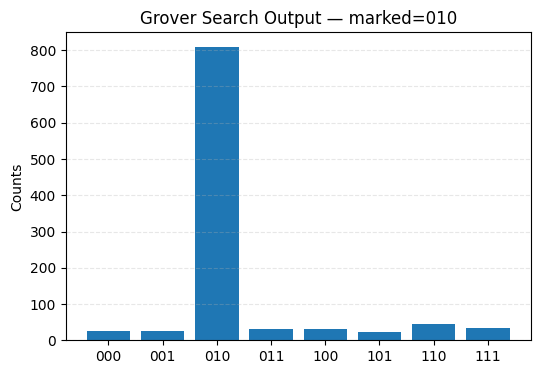

Counts: {'110': 46, '101': 23, '001': 26, '100': 30, '111': 33, '011': 32, '000': 25, '010': 809}


In [15]:
# ✅ TASK 1 — Different Marked States (Guaranteed Matplotlib Graph)

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np

# --- Oracle ---
def oracle(qc, n, marked_state):
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    if n == 1:
        qc.z(0)
    else:
        qc.h(n-1)
        qc.mcx(list(range(n-1)), n-1)
        qc.h(n-1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

# --- Diffuser ---
def diffuser(qc, n):
    if n == 1:
        qc.x(0); qc.h(0); qc.z(0); qc.h(0); qc.x(0); return
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)
    qc.x(range(n))
    qc.h(range(n))

# --- Grover Circuit ---
def grover(marked_state):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

# --- Stable Bar Graph ---
def run_plot(qc, title):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    result = sim.run(tqc, shots=1024).result()
    counts = result.get_counts()

    # ---- Manual Matplotlib Graph (always works) ----
    labels = sorted(counts.keys())
    values = [counts[l] for l in labels]
    x = np.arange(len(labels))

    plt.figure(figsize=(6,4))
    plt.bar(x, values)
    plt.xticks(x, labels)
    plt.ylabel("Counts")
    plt.title(title)
    plt.grid(axis="y", linestyle="--", alpha=0.3)
    plt.show()

    print("Counts:", counts)

# ✅ Run Task 1
for s in [ "111", "010"]:
    print("\nRunning Grover for marked state:", s)
    qc = grover(s)
    run_plot(qc, f"Grover Search Output — marked={s}")


# **Task 2: TASK 2: Add Constant Bit b → f(x) = s·x ⊕ b**

In [ ]:
def bv_oracle_with_b(qc, inputs, ancilla, s, b):
    # linear part
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)

    # constant term
    if b == 1:
        qc.x(ancilla)

def bv_circuit_with_b(s, b):
    n = len(s)
    qreg = QuantumRegister(n+1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)

    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(qreg)

    bv_oracle_with_b(qc, inputs, ancilla, s, b)

    for q in inputs:
        qc.h(q)

    qc.measure(inputs, creg)
    return qc

# Test s and b
s = "1011"
b = 1

qc = bv_circuit_with_b(s, b)
print(qc.draw(fold=-1))
run_bv(qc)

print("✅ Note: b does NOT change measured s, only affects ancilla!")


     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ ├───┤ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫─┤ X ├─╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║ └───┘ ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      1             0       2  3 
Measurement counts: {'1101': 1024}
Recovered: 1101
✅ Note: b does NOT change measured s, only affects ancilla!


# **TASK 3: Run on real IBM backend**

In [16]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def bv_oracle(qc, inputs, ancilla, s):
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)

def bernstein_vazirani_circuit(s):
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(qreg)
    bv_oracle(qc, inputs, ancilla, s)
    for q in inputs:
        qc.h(q)
    qc.measure(inputs, creg)
    return qc

def create_noise_model(error_rate):
    noise_model = NoiseModel()
    error_1q = depolarizing_error(error_rate, 1)
    noise_model.add_all_qubit_quantum_error(error_1q, ['h', 'x'])
    error_2q = depolarizing_error(error_rate * 2, 2)
    noise_model.add_all_qubit_quantum_error(error_2q, ['cx'])
    return noise_model

def run_bv_with_noise(qc, noise_model=None, shots=1024):
    sim = AerSimulator(noise_model=noise_model)
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    return counts

# Test with different noise levels
s = '1011'
error_rates = [0.0, 0.01, 0.05, 0.1]
shots = 2048

print(f'Secret string s = {s}\n')

for error_rate in error_rates:
    print(f'Error Rate: {error_rate:.2%}')
    qc = bernstein_vazirani_circuit(s)

    noise_model = None if error_rate == 0.0 else create_noise_model(error_rate)
    counts = run_bv_with_noise(qc, noise_model, shots)

    most = max(counts, key=counts.get)
    measured_reversed = most[::-1]
    success_rate = counts[most] / shots * 100

    print(f'Measured: {measured_reversed}, Success Rate: {success_rate:.1f}%')
    print(f'Top results: {dict(sorted(counts.items(), key=lambda x: x[1], reverse=True)[:3])}')

    plot_histogram(counts, title=f'Error Rate: {error_rate:.2%}')
    plt.show()
    print()

Secret string s = 1011

Error Rate: 0.00%
Measured: 1011, Success Rate: 100.0%
Top results: {'1101': 2048}

Error Rate: 1.00%
Measured: 1011, Success Rate: 92.2%
Top results: {'1101': 1888, '0101': 42, '1100': 32}

Error Rate: 5.00%
Measured: 1011, Success Rate: 68.5%
Top results: {'1101': 1402, '0101': 173, '1100': 115}

Error Rate: 10.00%
Measured: 1011, Success Rate: 45.8%
Top results: {'1101': 939, '0101': 298, '1001': 200}



# **Task 4: Add noise via qiskit_aer.noise.NoiseModel and analyze robustness**

BERNSTEIN-VAZIRANI ALGORITHM - STEP BY STEP

Secret string: s = 101
Goal: Recover s using only 1 quantum query

STEP 1: Initialize qubits
- Input qubits initialized to |0⟩
- Ancilla qubit initialized to |1⟩
          
q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘
c: 3/═════
          

STEP 2: Apply Hadamard gates to create superposition
- All qubits now in superposition
- Input qubits: equal superposition of all n-bit strings
- Ancilla: in state |-⟩ = (|0⟩-|1⟩)/√2
     ┌───┐      ░ 
q_0: ┤ H ├──────░─
     ├───┤      ░ 
q_1: ┤ H ├──────░─
     ├───┤      ░ 
q_2: ┤ H ├──────░─
     ├───┤┌───┐ ░ 
q_3: ┤ X ├┤ H ├─░─
     └───┘└───┘ ░ 
c: 3/═════════════
                  

STEP 3: Apply oracle
Oracle implements f(x) = s·x where s = 101
- Apply CNOT: q_0 → ancilla (because s[0]=1)
- Apply CNOT: q_2 → ancilla (because s[2]=1)
- Oracle creates phase kickback based on s·x
     ┌───┐      ░            ░ 
q_0: ┤ H ├──────░───■────────░─
     ├───┤     

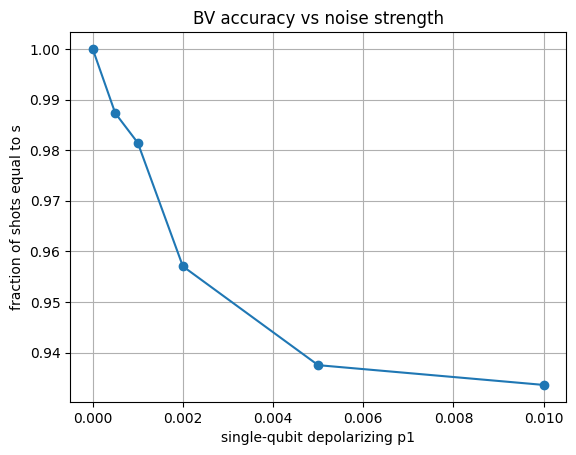

KEY POINTS
1. Classical algorithm needs n queries
2. Quantum algorithm needs only 1 query
3. Uses superposition and interference
4. Result is deterministic (100% success)


In [24]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

print("="*60)
print("BERNSTEIN-VAZIRANI ALGORITHM - STEP BY STEP")
print("="*60)

s = '101'
n = len(s)

print(f"\nSecret string: s = {s}")
print(f"Goal: Recover s using only 1 quantum query\n")

# Step 1: Initialize
print("STEP 1: Initialize qubits")
qreg = QuantumRegister(n + 1, 'q')
creg = ClassicalRegister(n, 'c')
qc = QuantumCircuit(qreg, creg)
qc.x(n)
print("- Input qubits initialized to |0⟩")
print("- Ancilla qubit initialized to |1⟩")
print(qc.draw())

# Step 2: Hadamard gates
print("\nSTEP 2: Apply Hadamard gates to create superposition")
qc.h(qreg)
qc.barrier()
print("- All qubits now in superposition")
print("- Input qubits: equal superposition of all n-bit strings")
print("- Ancilla: in state |-⟩ = (|0⟩-|1⟩)/√2")
print(qc.draw())

# Step 3: Oracle
print("\nSTEP 3: Apply oracle")
print(f"Oracle implements f(x) = s·x where s = {s}")
for i, bit in enumerate(s):
    if bit == '1':
        qc.cx(i, n)
        print(f"- Apply CNOT: q_{i} → ancilla (because s[{i}]=1)")
qc.barrier()
print("- Oracle creates phase kickback based on s·x")
print(qc.draw())

# Step 4: Hadamard again
print("\nSTEP 4: Apply Hadamard to input qubits")
for q in range(n):
    qc.h(q)
print("- Second Hadamard causes interference")
print("- Correct answer (s) amplified, others cancel")
print(qc.draw())

# Step 5: Measure
print("\nSTEP 5: Measure input qubits")
qc.measure(range(n), creg)
print(qc.draw())

# Run circuit
print("\n" + "="*60)
print("EXECUTION")
print("="*60)
sim = AerSimulator()
tqc = transpile(qc, sim)
job = sim.run(tqc, shots=1024)
result = job.result()
counts = result.get_counts()

print(f"Counts: {counts}")
plot_histogram(counts, title=f'Results for s={s}')
plt.show()

most = max(counts, key=counts.get)
measured_reversed = most[::-1]

print(f"\nSecret string s: {s}")
print(f"Measured result:  {measured_reversed}")

if measured_reversed == s:
    print("✅ Successfully recovered secret string in 1 query!")
else:
    print("Note: Check bit ordering")

print("\n" + "="*60)

import numpy as np
def bv_accuracy_under_noise(s='1011', p1_list=None, shots=1024):
    if p1_list is None:
        p1_list = [0.0, 0.0005, 0.001, 0.002, 0.005, 0.01]
    accuracies = []
    for p1 in p1_list:
        p2 = min(0.02, p1*10)
        nm = build_simple_noise_model(p1=p1, p2=p2)
        qc = bernstein_vazirani_circuit(s)
        counts = run_on_simulator(qc, shots=shots, noise_model=nm)
        most = max(counts, key=counts.get)
        acc = 1.0 if most == s else 0.0
        # for a better estimate, compute fraction of shots that equal s
        fraction = counts.get(s, 0) / shots
        accuracies.append((p1, fraction))
        print(f'p1={p1:.6f}  fraction_correct={fraction:.4f}  most={most}')
    # plot
    ps = [x[0] for x in accuracies]
    fr = [x[1] for x in accuracies]
    plt.figure()
    plt.plot(ps, fr, marker='o')
    plt.xlabel('single-qubit depolarizing p1')
    plt.ylabel('fraction of shots equal to s')
    plt.title('BV accuracy vs noise strength')
    plt.grid(True)
    plt.show()

bv_accuracy_under_noise('1011', shots=1024)
print("KEY POINTS")
print("="*60)
print("1. Classical algorithm needs n queries")
print("2. Quantum algorithm needs only 1 query")
print("3. Uses superposition and interference")
print("4. Result is deterministic (100% success)")

# **Task 5: Circuit Analysis (Oracle Unitary)**

### 🧠 Bernstein–Vazirani Algorithm Overview

- *Goal:* Find a hidden bit string s using a single query to the oracle.
- *Oracle Function:*  
  \( f(x) = s \cdot x \oplus b \)
  where  
  - s · x is the bitwise dot product mod 2  
  - b is an optional constant bit.

*Steps:*
1. Initialize n input qubits and one ancilla.
2. Apply X to the ancilla → creates |1⟩.
3. Apply Hadamard (H) to all qubits.
4. Call the oracle.
5. Apply Hadamard to inputs again.
6. Measure the input qubits — result reveals s.

🧩 If b=1, only the *ancilla’s phase* changes, not the measured bitstring.
